In [474]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [475]:
df = pd.read_csv("gmm_clusters.csv")

In [476]:
prePCA = pd.read_csv("prePCA.csv")

In [477]:
df.head()

,player,year,ott_PC1,long_PC1,short_PC1,arg_PC1,putt_PC1,long_PC1_scaled,short_PC1_scaled,arg_PC1_scaled,putt_PC1_scaled,Long Iron Game,Short Iron Game,Around-the-Green,Putting,gmm_cluster
0,Aaron Baddeley,2015,-1.245403,-1.365358,-1.944796,2.057671,2.445307,-0.772213,-1.190647,1.083946,1.553688,-0.695601,-1.004944,0.676635,1.023910,2
1,Adam Hadwin,2015,1.280056,0.697110,-0.682807,-0.590203,0.265212,0.394268,-0.418029,-0.310909,0.168509,1.127317,-0.973874,-0.696784,0.543340,4
2,Adam Scott,2015,-1.119878,-0.719802,0.493721,-2.054937,-3.067988,-0.407102,0.302267,-1.082506,-1.949324,0.392469,1.130820,-0.310528,-1.212760,3
3,Alex Cejka,2015,1.418699,0.323083,1.084762,0.338617,-0.653147,0.182728,0.664115,0.178378,-0.414994,0.068302,1.158073,0.058454,-1.284829,0
4,Alex Prugh,2015,0.289179,0.776559,1.524262,-3.034307,-2.297580,0.439203,0.933186,-1.598422,-1.459826,0.664069,1.045214,-0.908110,-0.801173,3


In [478]:
df.rename(columns={"ott_PC1": "Off-the-Tee"}, inplace=True)

In [479]:
cols = df.columns.difference(['player', 'year', 'gmm_cluster'])
cols = cols.difference([col for col in df.columns if 'scaled' not in col])

cols

Index(['arg_PC1_scaled', 'long_PC1_scaled', 'putt_PC1_scaled',
       'short_PC1_scaled'],
      dtype='object')

In [480]:
pop_means = df[cols].mean()
pop_sds = df[cols].std()

In [481]:
pop_means

arg_PC1_scaled     -1.381035e-17
long_PC1_scaled     1.381035e-17
putt_PC1_scaled    -2.762071e-17
short_PC1_scaled   -3.452589e-18
dtype: float64

In [482]:
cluster_means = df.groupby("gmm_cluster")[cols].mean()

In [483]:
ott_means = df.groupby("gmm_cluster")["Off-the-Tee"].mean()

ott_means

gmm_cluster
0    0.650846
1   -0.135781
2   -0.060118
3    0.082165
4   -0.577837
Name: Off-the-Tee, dtype: float64

In [484]:
cluster_means

,arg_PC1_scaled,long_PC1_scaled,putt_PC1_scaled,short_PC1_scaled
gmm_cluster,,,,
0,0.657550,-0.301517,-0.332236,0.647702
1,-0.812773,0.079790,0.407391,0.141651
2,0.587185,-0.904259,0.838977,-0.577112
3,-0.529541,0.796407,-0.898317,0.560118
4,0.063594,0.552824,-0.199579,-0.760322


In [485]:
cluster_z = (cluster_means - pop_means) / pop_sds
cluster_z = cluster_z.round(2)
cluster_z

,arg_PC1_scaled,long_PC1_scaled,putt_PC1_scaled,short_PC1_scaled
gmm_cluster,,,,
0,0.66,-0.30,-0.33,0.65
1,-0.81,0.08,0.41,0.14
2,0.59,-0.90,0.84,-0.58
3,-0.53,0.80,-0.90,0.56
4,0.06,0.55,-0.20,-0.76


In [486]:
import scipy.stats as st

cluster_percentiles = cluster_z.map(lambda z: st.norm.cdf(z))
cluster_percentiles = (cluster_percentiles * 100).round(1)
cluster_percentiles

,arg_PC1_scaled,long_PC1_scaled,putt_PC1_scaled,short_PC1_scaled
gmm_cluster,,,,
0,74.5,38.2,37.1,74.2
1,20.9,53.2,65.9,55.6
2,72.2,18.4,80.0,28.1
3,29.8,78.8,18.4,71.2
4,52.4,70.9,42.1,22.4


In [487]:
prePCA.head()

,year,player,sg_total,par_3_scoring_average,par_4_scoring_average,par_5_scoring_average,sg_off_the_tee,driving_distance,driving_accuracy_percentage,going_for_the_green,...,scrambling_from_20_30_yards,sg_putting,putting_average,one_putt_percentage,birdie_or_better_conversion_percentage,3_putt_avoidance___10_15',3_putt_avoidance___15_20',3_putt_avoidance___20_25',3_putt_avoidance_>_25',average_distance_of_putts_made
0,2015,Aaron Baddeley,-0.223,2.99,4.10,4.57,-0.596,294.1,0.5029,0.5427,...,0.6374,0.722,1.744,0.4272,0.3152,0.0113,0.0141,0.0114,0.0662,79.416667
1,2015,Adam Hadwin,0.183,3.05,4.04,4.68,0.088,288.2,0.6543,0.5086,...,0.5244,0.235,1.772,0.3793,0.2830,0.0045,0.0058,0.0214,0.0886,78.166667
2,2015,Adam Scott,0.206,3.14,4.04,4.58,0.682,311.6,0.6069,0.6126,...,0.4063,-0.396,1.806,0.3588,0.3005,0.0247,0.0000,0.0408,0.1623,74.166667
3,2015,Alex Cejka,-0.217,3.04,4.03,4.67,-0.233,283.3,0.6378,0.4207,...,0.5795,-0.232,1.765,0.3931,0.2897,0.0090,0.0063,0.0238,0.1107,69.500000
4,2015,Alex Prugh,-0.004,3.03,4.06,4.61,0.319,295.2,0.6203,0.5178,...,0.5063,-0.055,1.792,0.3389,0.2790,0.0000,0.0071,0.0078,0.0904,66.083333


In [488]:
performance_col = "sg_total"

df = df.merge(
    prePCA[["player", "year", performance_col]],
    on=["player", "year"],
    how="left"
)

df.head()

,player,year,Off-the-Tee,long_PC1,short_PC1,arg_PC1,putt_PC1,long_PC1_scaled,short_PC1_scaled,arg_PC1_scaled,putt_PC1_scaled,Long Iron Game,Short Iron Game,Around-the-Green,Putting,gmm_cluster,sg_total
0,Aaron Baddeley,2015,-1.245403,-1.365358,-1.944796,2.057671,2.445307,-0.772213,-1.190647,1.083946,1.553688,-0.695601,-1.004944,0.676635,1.023910,2,-0.223
1,Adam Hadwin,2015,1.280056,0.697110,-0.682807,-0.590203,0.265212,0.394268,-0.418029,-0.310909,0.168509,1.127317,-0.973874,-0.696784,0.543340,4,0.183
2,Adam Scott,2015,-1.119878,-0.719802,0.493721,-2.054937,-3.067988,-0.407102,0.302267,-1.082506,-1.949324,0.392469,1.130820,-0.310528,-1.212760,3,0.206
3,Alex Cejka,2015,1.418699,0.323083,1.084762,0.338617,-0.653147,0.182728,0.664115,0.178378,-0.414994,0.068302,1.158073,0.058454,-1.284829,0,-0.217
4,Alex Prugh,2015,0.289179,0.776559,1.524262,-3.034307,-2.297580,0.439203,0.933186,-1.598422,-1.459826,0.664069,1.045214,-0.908110,-0.801173,3,-0.004


In [489]:
top_players_per_cluster = (
    df
    .sort_values(performance_col, ascending=False)
    .groupby(["year", "gmm_cluster"])
    .head(5)[["player", "year", performance_col, "gmm_cluster"]]
    .sort_values(["year", "gmm_cluster", performance_col], ascending=[True, True, False])
)

top_players_per_cluster[top_players_per_cluster["year"] == 2025]

,player,year,sg_total,gmm_cluster
2025,Scottie Scheffler,2025,2.743,0
2015,Russell Henley,2025,1.317,0
1961,Keegan Bradley,2025,0.981,0
1883,Aaron Rai,2025,0.808,0
1906,Bud Cauley,2025,0.724,0
2027,Sepp Straka,2025,1.072,1
2001,Patrick Cantlay,2025,1.057,1
2040,Thorbjørn Olesen,2025,0.850,1
1965,Kevin Yu,2025,0.794,1
1986,Maverick McNealy,2025,0.740,1


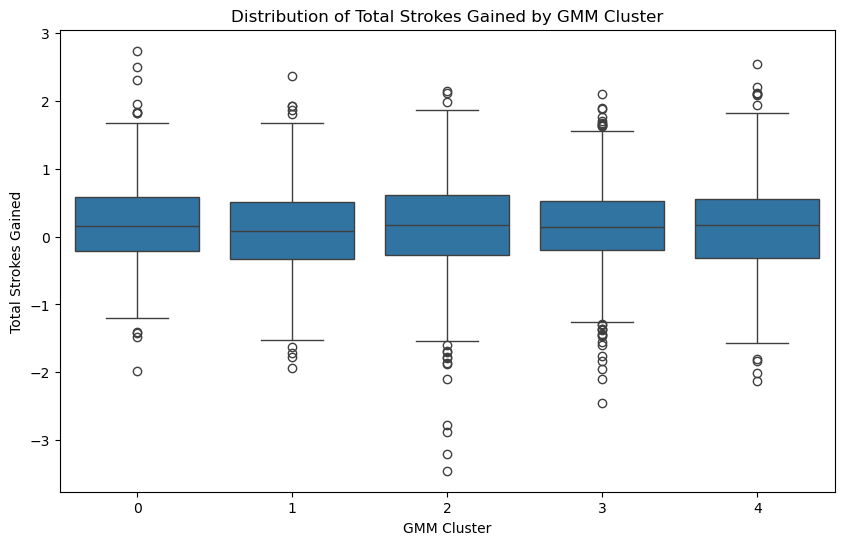

In [490]:
# visualize strokes gained distribution per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="gmm_cluster", y=performance_col)
plt.title("Distribution of Total Strokes Gained by GMM Cluster")
plt.xlabel("GMM Cluster")
plt.ylabel("Total Strokes Gained")
plt.show()

In [491]:
cluster_counts = (
    df[df.groupby("player")["year"].transform("nunique") >= 5]
    .groupby("player")["gmm_cluster"]
    .unique()
)

n_clusters = cluster_counts.apply(len)

stable_players = n_clusters[n_clusters <= 2].index
movers_players  = n_clusters[n_clusters > 2].index

player_avg_sg = df.groupby("player")["sg_total"].mean()

stable_sg = player_avg_sg.loc[stable_players]
movers_sg = player_avg_sg.loc[movers_players]

t_stat, p_value = st.ttest_ind(stable_sg, movers_sg, equal_var=False)


print("===== Cluster Stability vs Movement: SG_total Comparison =====\n")

print(f"Stable players (N={len(stable_sg)}) mean SG = {stable_sg.mean():.3f}")
print(f"Movers  (N={len(movers_sg)}) mean SG = {movers_sg.mean():.3f}\n")

print(f"T-test (Welch): t = {t_stat:.3f}, p = {p_value:.6f}")

===== Cluster Stability vs Movement: SG_total Comparison =====

Stable players (N=40) mean SG = 0.244
Movers  (N=145) mean SG = 0.269

T-test (Welch): t = -0.236, p = 0.814208


In [492]:
def plot_player_path(player):
    df2 = df[df.player == player].sort_values("year")
    plt.plot(df2.year, df2.gmm_cluster, marker="o")
    plt.title(f"{player} — Cluster Trajectory")
    plt.xlabel("Year")
    plt.ylabel("gmm_cluster")
    plt.yticks(sorted(df2["gmm_cluster"].unique()))
    plt.grid(True)
    plt.show()

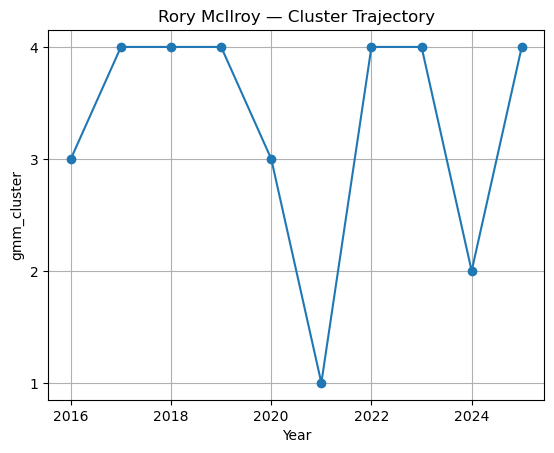

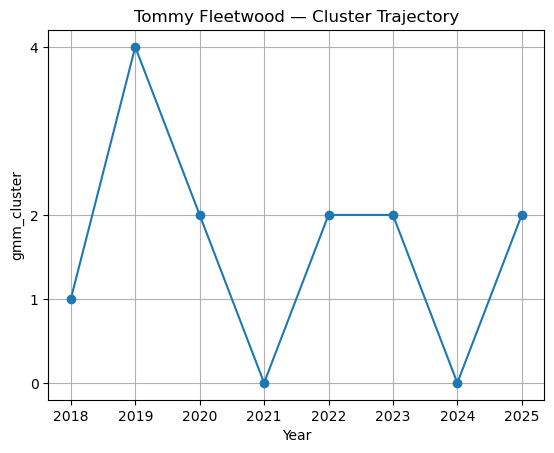

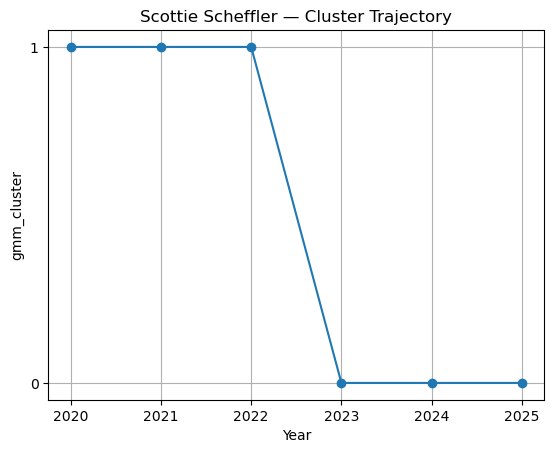

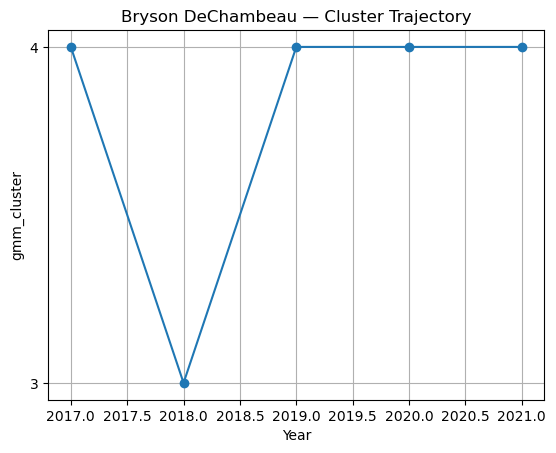

In [493]:
plot_player_path("Rory McIlroy")
plot_player_path("Tommy Fleetwood")
plot_player_path("Scottie Scheffler")
plot_player_path("Bryson DeChambeau")

In [494]:
df.head()

,player,year,Off-the-Tee,long_PC1,short_PC1,arg_PC1,putt_PC1,long_PC1_scaled,short_PC1_scaled,arg_PC1_scaled,putt_PC1_scaled,Long Iron Game,Short Iron Game,Around-the-Green,Putting,gmm_cluster,sg_total
0,Aaron Baddeley,2015,-1.245403,-1.365358,-1.944796,2.057671,2.445307,-0.772213,-1.190647,1.083946,1.553688,-0.695601,-1.004944,0.676635,1.023910,2,-0.223
1,Adam Hadwin,2015,1.280056,0.697110,-0.682807,-0.590203,0.265212,0.394268,-0.418029,-0.310909,0.168509,1.127317,-0.973874,-0.696784,0.543340,4,0.183
2,Adam Scott,2015,-1.119878,-0.719802,0.493721,-2.054937,-3.067988,-0.407102,0.302267,-1.082506,-1.949324,0.392469,1.130820,-0.310528,-1.212760,3,0.206
3,Alex Cejka,2015,1.418699,0.323083,1.084762,0.338617,-0.653147,0.182728,0.664115,0.178378,-0.414994,0.068302,1.158073,0.058454,-1.284829,0,-0.217
4,Alex Prugh,2015,0.289179,0.776559,1.524262,-3.034307,-2.297580,0.439203,0.933186,-1.598422,-1.459826,0.664069,1.045214,-0.908110,-0.801173,3,-0.004


In [495]:
import statsmodels.api as sm
pc_cols = [c for c in df.columns if "scaled" in c or "Off-the-Tee" in c]

X = df[pc_cols]
X = X.astype(float)

y = df["sg_total"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               sg_total   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     719.7
Date:                Thu, 08 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:40:57   Log-Likelihood:                -1165.6
No. Observations:                2058   AIC:                             2343.
Df Residuals:                    2052   BIC:                             2377.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1384      0.009  

In [496]:
pc_cols = [c for c in df.columns if "scaled" in c or "Off-the-Tee" in c]

X = df[pc_cols + ["gmm_cluster"]]
X = pd.get_dummies(X, columns=["gmm_cluster"])
X = X.astype(float)

y = df["sg_total"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               sg_total   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     400.9
Date:                Thu, 08 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:40:57   Log-Likelihood:                -1162.7
No. Observations:                2058   AIC:                             2345.
Df Residuals:                    2048   BIC:                             2402.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1155      0.008  

In [497]:
rounds_df = pd.read_csv("rounds_after_course_elim.csv")

In [498]:
rounds_df.head()

,tour,year,event_id,player_name,fin_text,round_num,round_score,finish_num,top_10
0,pga,2015,16,"Senden, John",T25,4,71.0,25.0,0
1,pga,2015,16,"Clark, Tim",T25,3,67.0,25.0,0
2,pga,2015,16,"Clark, Tim",T25,2,75.0,25.0,0
3,pga,2015,16,"Clark, Tim",T25,1,70.0,25.0,0
4,pga,2015,16,"Streelman, Kevin",T22,4,73.0,22.0,0


In [499]:
rounds_df = rounds_df[rounds_df["round_num"] == 4]

In [500]:
def fix_name(name):
    if "," in name:
        last, first = name.split(",", 1)
        return first.strip() + " " + last.strip()
    return name.strip()

rounds_df["player"] = rounds_df["player_name"].apply(fix_name)

In [501]:
pc_cols = [c for c in df.columns if "scaled" in c or "Off-the-Tee" in c]

rounds_df = rounds_df.merge(
    df[["player", "year"] + pc_cols + ["gmm_cluster", "sg_total"]],
    on=["player", "year"],
    how="left"
)

In [502]:
df[df.player == "Rory McIlroy"]

,player,year,Off-the-Tee,long_PC1,short_PC1,arg_PC1,putt_PC1,long_PC1_scaled,short_PC1_scaled,arg_PC1_scaled,putt_PC1_scaled,Long Iron Game,Short Iron Game,Around-the-Green,Putting,gmm_cluster,sg_total
323,Rory McIlroy,2016,-0.710527,3.566509,1.313015,0.215959,0.177308,2.017131,0.803856,0.113764,0.112657,1.397933,0.046778,-0.721739,-0.722971,3,1.681
512,Rory McIlroy,2017,-2.313315,1.804548,-2.519069,0.672497,-0.728095,1.020609,-1.542228,0.354260,-0.462614,1.066544,-1.253611,0.463294,-0.276228,4,1.078
705,Rory McIlroy,2018,-2.399452,2.516251,1.136011,1.573919,1.350151,1.423130,0.695490,0.829114,0.857853,1.463430,-0.793884,-0.379351,-0.290196,4,1.412
894,Rory McIlroy,2019,-1.106131,3.548309,1.375298,3.264823,3.013610,2.006838,0.841987,1.719854,1.914774,0.724350,-1.461700,0.185774,0.551576,4,2.551
1082,Rory McIlroy,2020,-1.898115,2.759789,1.203396,0.080559,0.597671,1.560870,0.736745,0.042437,0.379745,1.350851,0.087094,-0.977596,-0.460349,3,1.243
1279,Rory McIlroy,2021,-2.153381,1.085768,1.191388,-0.461765,1.940850,0.614084,0.729393,-0.243250,1.233169,0.050128,0.238193,-1.348151,1.059831,1,1.368
1474,Rory McIlroy,2022,-2.206317,2.479376,1.344163,2.779066,1.526298,1.402275,0.822926,1.463965,0.969772,0.750160,-1.079442,0.944978,-0.615696,4,2.115
1650,Rory McIlroy,2023,-3.242032,2.344946,0.597667,1.640358,2.050149,1.326245,0.365905,0.864113,1.302614,0.799403,-1.324096,-0.222460,0.747152,4,2.102
1836,Rory McIlroy,2024,-1.817091,-0.004187,0.362439,2.999808,1.730785,-0.002368,0.221893,1.580248,1.099698,-0.979410,-0.677384,1.151989,0.504805,2,1.412
2014,Rory McIlroy,2025,-3.272431,1.461952,-0.016325,2.018276,2.073139,0.826844,-0.009995,1.063194,1.317222,0.047834,-1.406276,0.458519,0.899923,4,1.543


In [503]:
rounds_df = rounds_df.dropna(subset=pc_cols + ["top_10"])

In [504]:
rounds_df[rounds_df.player == "Rory McIlroy"]

,tour,year,event_id,player_name,fin_text,round_num,round_score,finish_num,top_10,player,Off-the-Tee,long_PC1_scaled,short_PC1_scaled,arg_PC1_scaled,putt_PC1_scaled,gmm_cluster,sg_total
3610,pga,2016,7,"McIlroy, Rory",T20,4,75.0,20.0,0,Rory McIlroy,-0.710527,2.017131,0.803856,0.113764,0.112657,3.0,1.681
3723,pga,2016,473,"McIlroy, Rory",T3,4,74.0,3.0,1,Rory McIlroy,-0.710527,2.017131,0.803856,0.113764,0.112657,3.0,1.681
3895,pga,2016,9,"McIlroy, Rory",T27,4,65.0,27.0,0,Rory McIlroy,-0.710527,2.017131,0.803856,0.113764,0.112657,3.0,1.681
4067,pga,2016,14,"McIlroy, Rory",T10,4,71.0,10.0,1,Rory McIlroy,-0.710527,2.017131,0.803856,0.113764,0.112657,3.0,1.681
4253,pga,2016,480,"McIlroy, Rory",T4,4,66.0,4.0,1,Rory McIlroy,-0.710527,2.017131,0.803856,0.113764,0.112657,3.0,1.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33435,pga,2025,34,"McIlroy, Rory",T6,4,65.0,6.0,1,Rory McIlroy,-3.272431,0.826844,-0.009995,1.063194,1.317222,4.0,1.543
33655,pga,2025,541,"McIlroy, Rory",T2,4,68.0,2.0,1,Rory McIlroy,-3.272431,0.826844,-0.009995,1.063194,1.317222,4.0,1.543
33770,pga,2025,100,"McIlroy, Rory",T7,4,69.0,7.0,1,Rory McIlroy,-3.272431,0.826844,-0.009995,1.063194,1.317222,4.0,1.543
34115,pga,2025,28,"McIlroy, Rory",T12,4,70.0,12.0,0,Rory McIlroy,-3.272431,0.826844,-0.009995,1.063194,1.317222,4.0,1.543


In [505]:
player_year_df = (
    rounds_df.groupby(["player", "year"], as_index=False)
             .agg(top10_count=("top_10", "sum"))
)

In [506]:
pc_cols = [c for c in df.columns if "scaled" in c or "Off-the-Tee" in c]

player_year_df = player_year_df.merge(
    df[["player", "year"] + pc_cols + ["gmm_cluster"]],
    on=["player", "year"],
    how="left"
)


In [507]:
player_year_df.head()

,player,year,top10_count,Off-the-Tee,long_PC1_scaled,short_PC1_scaled,arg_PC1_scaled,putt_PC1_scaled,gmm_cluster
0,Aaron Baddeley,2015,2,-1.245403,-0.772213,-1.190647,1.083946,1.553688,2
1,Aaron Baddeley,2016,5,-0.359752,-1.237356,-0.693215,1.952516,0.841423,2
2,Aaron Baddeley,2017,2,-0.863493,-1.789794,-0.177251,0.686369,0.472731,2
3,Aaron Baddeley,2018,1,-0.924627,-0.831734,-0.473668,0.505899,-0.363616,0
4,Aaron Baddeley,2019,2,0.362932,-1.760357,-0.637869,1.696474,1.752704,2


In [508]:
X = player_year_df[pc_cols]
X = sm.add_constant(X)

y = player_year_df["top10_count"]

ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:            top10_count   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     279.4
Date:                Thu, 08 Jan 2026   Prob (F-statistic):          3.16e-227
Time:                        23:40:58   Log-Likelihood:                -4176.7
No. Observations:                2014   AIC:                             8365.
Df Residuals:                    2008   BIC:                             8399.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.5661      0.043  

In [509]:
X = player_year_df[pc_cols + ["gmm_cluster"]]
X = pd.get_dummies(X, columns=["gmm_cluster"]).astype(float)
X = sm.add_constant(X)

y = player_year_df["top10_count"]

ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:            top10_count   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     155.7
Date:                Thu, 08 Jan 2026   Prob (F-statistic):          2.51e-223
Time:                        23:40:58   Log-Likelihood:                -4174.8
No. Observations:                2014   AIC:                             8370.
Df Residuals:                    2004   BIC:                             8426.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1424      0.036  